In [104]:
using LinearAlgebra

In [105]:
# Cosine Similarity for determining how "similar" two vectors are. 
# Why use cosine similarity? Because in with eigenvectors, magnitude does not matter, only direction. 

# inputs: a, b are two vectors of the same dimension
# \result: [-1, 1]
function cosine_similarity(a::Vector, b::Vector)
    return dot(a, b) / (norm(a) * norm(b))
end


cosine_similarity (generic function with 1 method)

In [106]:
# Power method for finding the largest eigenvector/value pair

# A:            matrix we are going to calculate with
# u_0:          initial vector
# tolerance:    necessary level of accuracy before returning, value in [0, 1]
# oracle_vec:   oracle eigenvector for what we are calculating
# \result:      eigenvetor, eigenvalue, number of iterations to reach tolerance
function power_method(A, u_k, tolerance, with_print=false) 

    # 1. Set initial variables 
    similarity = 0
    num_iterations = 0 

    # 2. While similarity is not of certain point...
    while (abs(similarity) < 1 - tolerance)
        
        # 2.a let u_k' = A u_k
        u_k_ = A * u_k

        # normalize u_k_, this is done to prevent u_k from getting too large or too small, avoiding instablities
        u_k_ /= norm(u_k_)

        # 2.b update similarity & u_k
        similarity = cosine_similarity(u_k, u_k_)

        u_k = u_k_

        # 2.c increment k
        num_iterations += 1

        if with_print
            println("Iteration: ", num_iterations, " Similarity: ", similarity) 
        end
    end


    # 3. We know vectors are similar enough, so return calculated vector, eigenvector, and num iterations

    # 3.a calculate eigen value
    # This has been done using Rayleigh Quotient (https://en.wikipedia.org/wiki/Rayleigh_quotient)
    eigenvalue = dot(u_k, A * u_k) / dot(u_k, u_k)

    return u_k, eigenvalue, num_iterations
end

power_method (generic function with 2 methods)

In [107]:
# This function calculates the eigenvalue closest to 0. 
# Does this through LU decomposition

# Potential Issues: by not shifting, we are essentially using a shift of 0
# this is problematic because if 0 is an eigenvalue, then our matrix will 
# be singular and our function will error. (see line 21)

function naieve_inverse_power_method_LU(A, u_k, tolerance, with_print=false)
    # println("Starting Inverse Power Method with LU Decomposition")

    # Perform LU decomposition of A
    # Julia's factorize function automatically chooses the best factorization
    LU = factorize(A)

    # Set initial similarity to 0
    similarity = 0
    num_iterations = 0 

    while (abs(similarity) < 1 - tolerance)
        # Solve the system using LU factors
        u_k_ = LU \ u_k # requires LU = A to not be singular!!

        # Normalize u_k
        u_k_ /= norm(u_k_)

        # Update similarity
        similarity = cosine_similarity(u_k, u_k_)

        u_k = u_k_

        # Increment iteration count
        num_iterations += 1

        if with_print
            println("Iteration: ", num_iterations, " Similarity: ", similarity, "Current Estimate: ", u_k) 
        end
    end

    # Calculate eigenvalue using Rayleigh Quotient
    eigenvalue = dot(u_k, A * u_k) / dot(u_k, u_k)

    return u_k, eigenvalue, num_iterations
end


naieve_inverse_power_method_LU (generic function with 2 methods)

In [108]:
# This function calculates the eigenvalue closest to 0. 
# Does this through LU decomposition

# Potential Issues: by not shifting, we are essentially using a shift of 0
# this is problematic because if 0 is an eigenvalue, then our matrix will 
# be singular and our function will error. (see line 21)

function inverse_power_method_LU(A, u_k, tolerance, mu, with_print=false)
    println("Starting Inverse Power Method with LU Decomposition")

    # Perform LU decomposition of A
    # Julia's factorize function automatically chooses the best factorization
    LU = factorize(A)

    # Set initial similarity to 0
    similarity = 0
    num_iterations = 0 

    while (abs(similarity) < 1 - tolerance)
        # Solve the system using LU factors
        u_k_ = LU \ u_k # requires LU = A to not be singular!!

        # Normalize u_k
        u_k_ /= norm(u_k_)

        # Update similarity
        similarity = cosine_similarity(u_k, u_k_)

        u_k = u_k_

        # Increment iteration count
        num_iterations += 1

        if with_print
            println("Iteration: ", num_iterations, " Similarity: ", similarity, "Current Estimate: ", u_k) 
        end
    end

    # Calculate eigenvalue using Rayleigh Quotient
    eigenvalue = dot(u_k, A * u_k) / dot(u_k, u_k)

    return u_k, eigenvalue, num_iterations
end


inverse_power_method_LU (generic function with 3 methods)

In [109]:
A = diagm(0 => [0.001, 123413, 0.1])
u_0 = rand(3)
tolerance = 1e-3

apx_eigenvec, apx_eigenval, num_iterations = naieve_inverse_power_method_LU(A, u_0, tolerance)
println("<-- Inverse Power Methods results for Diagonal Matrix -->")
print("A: ") 
println(A)
println("Approximated Eigenvector: ", apx_eigenvec)
println("Approximated Eigenvalue: ", apx_eigenval)
println("Number of Iterations: ", num_iterations)

<-- Inverse Power Methods results for Diagonal Matrix -->
A: [0.001 0.0 0.0; 0.0 123413.0 0.0; 0.0 0.0 0.1]
Approximated Eigenvector: [0.9999999575255523, 2.421374990572518e-16, 0.0002914599348826104]
Approximated Eigenvalue: 0.0010000084099404706
Number of Iterations: 2


In [110]:
# Example of using inverse_power_method_LU including a shift using the Raliegh Quotient. 
# This works because the shift doesn't change the eigenvectors? (Need to look into this more, 
# I think it does shift it but it's in the textbook so i'm not exactly sure.) (another note, i think this finds the eigenvalue closest to the shift. when 
# the shift is 0, it will find \lamda_min. when you use something else for the shift, it will find the closest for that)

A = diagm(0 => [4, 3, 4])
u_0 = rand(3)
tolerance = 1e-3

apx_eigenvec, apx_eigenval, num_iterations = inverse_power_method_LU(A, u_0, tolerance)
println("<-- Inverse Power Methods results for Diagonal Matrix -->")
print("A: ") 
println(A)
println("Approximated Eigenvector: ", apx_eigenvec)
println("Approximated Eigenvalue: ", apx_eigenval)
println("Number of Iterations: ", num_iterations)

Starting Inverse Power Method with LU Decomposition
<-- Inverse Power Methods results for Diagonal Matrix -->
A: [4 0 0; 0 3 0; 0 0 4]
Approximated Eigenvector: [0.12604780066636945, 0.9913795192065082, 0.0357575285086043]
Approximated Eigenvalue: 3.0171666488978723
Number of Iterations: 7


In [111]:
# Example of using power method to determine the largest eigenvalue of a

A = diagm(0 => [4, 3, 4])
u_0 = rand(3)
tolerance = 1e-3

apx_eigenvec, apx_eigenval, num_iterations = power_method(A, u_0, tolerance)
println("<--  Power Methods results for Diagonal Matrix -->")
print("A: ") 
println(A)
println("Approximated Eigenvector: ", apx_eigenvec)
println("Approximated Eigenvalue: ", apx_eigenval)
println("Number of Iterations: ", num_iterations)

<--  Power Methods results for Diagonal Matrix -->
A: [4 0 0; 0 3 0; 0 0 4]
Approximated Eigenvector: [0.6605226040611433, 0.11033532693867731, 0.7426547011590389]
Approximated Eigenvalue: 3.987826115629335
Number of Iterations: 6


In [112]:
using Plots

function generate_matrix_with_gap(largest_eigenvalue, second_largest_eigenvalue)
    # Create a diagonal matrix with the largest and second-largest eigenvalues specified.
    # The rest of the eigenvalues can be filled in as needed, ensuring they are less than the second largest.
    return diagm(0 => [largest_eigenvalue, second_largest_eigenvalue, rand(second_largest_eigenvalue/2:second_largest_eigenvalue, 3)...])
end

function run_experiment_with_gap(algorithm, eigenvalue_gaps, largest_eigenvalue)
    runtimes = []
    iterations = []
    for gap in eigenvalue_gaps
        second_largest_eigenvalue = largest_eigenvalue * gap
        A = generate_matrix_with_gap(largest_eigenvalue, second_largest_eigenvalue)
        u_0 = rand(size(A, 1))
        tolerance = 1e-6
        runtime = @elapsed _, _, num_iterations = power_method(A, u_0, tolerance)
        push!(runtimes, runtime)
        push!(iterations, num_iterations)
    end
    return runtimes, iterations
end

function generate_matrix_with_small_eigenvalue(smallest_eigenvalue, size=5)
    # Create a diagonal matrix with the smallest eigenvalue and other larger eigenvalues.
    eigenvalues = [smallest_eigenvalue; 2; 3; 4; 5] # Adjust as needed for larger matrices
    return diagm(0 => eigenvalues[1:size])
end

function run_inverse_power_method_experiment(eigenvalues, size, tolerance)
    runtimes = []
    iterations = []
    for ev in eigenvalues
        A = generate_matrix_with_small_eigenvalue(ev, size)
        u_0 = rand(size)
        u_0 = u_0 / norm(u_0)
        mu = ev / 10  # Set shift mu to a value smaller than the smallest eigenvalue
        runtime = @elapsed _, _, num_iterations = inverse_power_method_LU(A, u_0, tolerance, mu)
        push!(runtimes, runtime)
        push!(iterations, num_iterations)
    end
    return runtimes, iterations
end



run_inverse_power_method_experiment (generic function with 1 method)

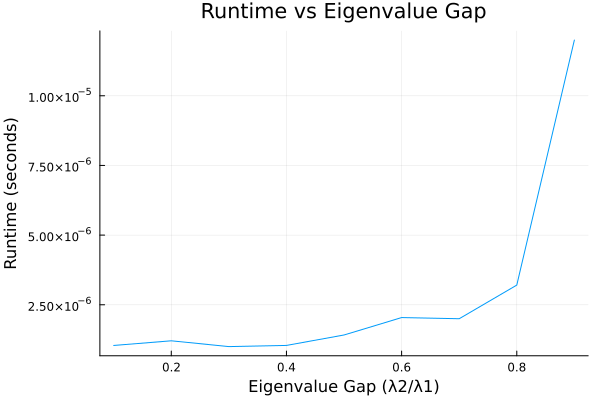

In [156]:
## Code for determine run time vs ratio of lambda_1 to lambda_2
## Power Method Speed

# Define the largest eigenvalue
largest_eigenvalue = 10  # For example

# Define the range of eigenvalue gaps to test (e.g., 0.1 means λ2 is 10% of λ1)
eigenvalue_gaps = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Run the experiment
runtimes, iterations = run_experiment_with_gap(power_method, eigenvalue_gaps, largest_eigenvalue)

# Plotting the results
plot(eigenvalue_gaps, runtimes, xlabel="Eigenvalue Gap (λ2/λ1)", ylabel="Runtime (seconds)", title="Runtime vs Eigenvalue Gap", legend=false)

Starting Inverse Power Method with LU Decomposition
Starting Inverse Power Method with LU Decomposition
Starting Inverse Power Method with LU Decomposition
Starting Inverse Power Method with LU Decomposition
Starting Inverse Power Method with LU Decomposition
Starting Inverse Power Method with LU Decomposition
Starting Inverse Power Method with LU Decomposition
Starting Inverse Power Method with LU Decomposition
Starting Inverse Power Method with LU Decomposition
Starting Inverse Power Method with LU Decomposition


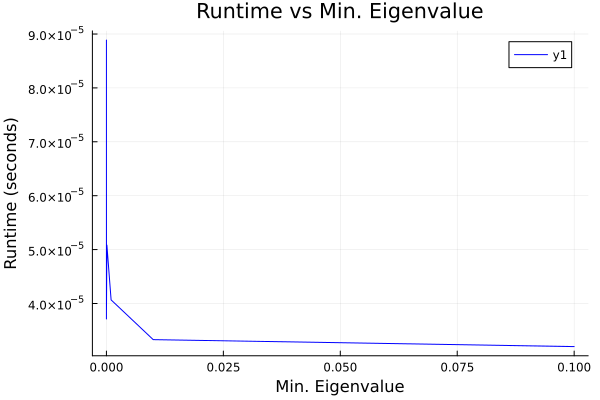

In [157]:
## Code for determine run time vs smallest eigenvalue
## Inverse Power Method Speed

# Smallest eigenvalues to test
eigenvalues = 10 .^ (-10.0:1.0:-1.0)  # Eigenvalues from 10^-10 to 10^-2
tolerance = 1e-6

# Run the experiment
runtimes, iteration_counts = run_inverse_power_method_experiment(eigenvalues, 5, tolerance)

# Create the first plot for the runtime
plot(eigenvalues, runtimes, xlabel="Min. Eigenvalue", ylabel="Runtime (seconds)", title="Runtime vs Min. Eigenvalue", color=:blue)

